**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/scaling-and-normalization).**

---


In this exercise, you'll apply what you learned in the **Scaling and normalization** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex2 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

To practice scaling and normalization, we're going to use a [dataset of Kickstarter campaigns](https://www.kaggle.com/kemical/kickstarter-projects). (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using. 

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  The plots show a histogram of the values in the "usd_goal_real" column, both before and after scaling.  

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

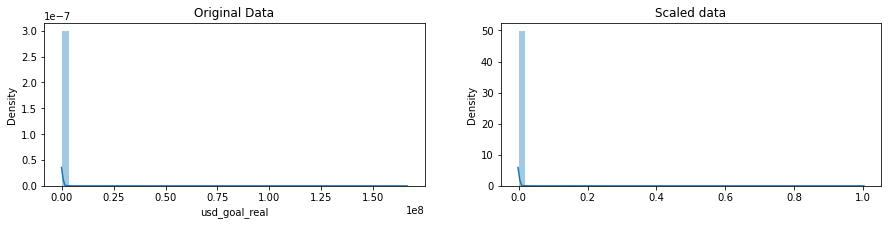

In [3]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [4]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [5]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minimax_scaling()` function.

In [9]:
# TODO: Your code here
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

# Check your answer
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [8]:
# Lines below will give you a hint or solution code
#q1.hint()
#q1.solution()

# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

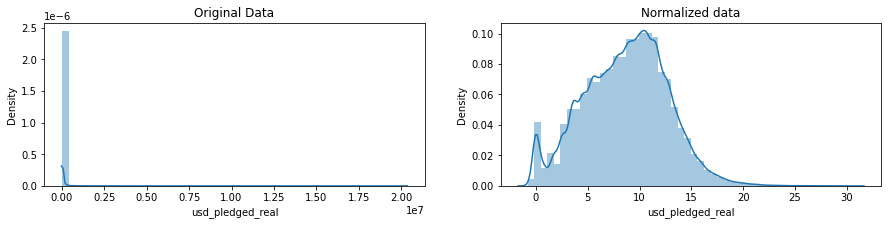

In [12]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to a normal distribution!

In [13]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

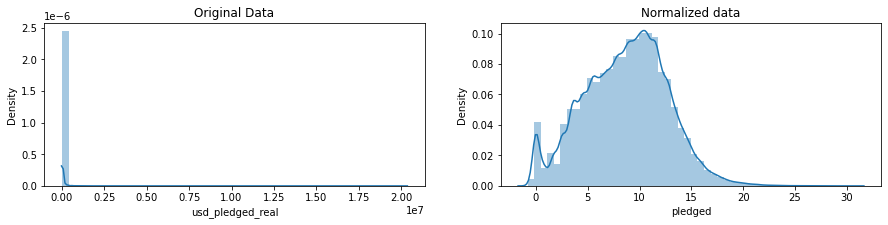

In [15]:
# TODO: Your code here!
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='pledged', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [16]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: pledged, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


How does the normalized "usd_pledged_real" column look different from when we normalized the "pledged" column?  Or, do they look mostly the same?

Once you have an answer, run the code cell below.

In [ ]:
# Check your answer (Run this code cell to receive credit!)
q2.check()

In [10]:
# Line below will give you a hint
#q2.hint()

# (Optional) More practice

Try finding a new dataset and pretend you're preparing to perform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge). 

[These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)

Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

# Keep going

In the next lesson, learn how to [**parse dates**](https://www.kaggle.com/alexisbcook/parsing-dates) in a dataset.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/172650) to chat with other Learners.*